In [119]:
import re
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
group = ['svm_knn', 'svm_rfc', 'xgb_knn', 'xgb_rfc']

In [144]:
df = pd.DataFrame(columns=['group', 'file', 'n_features', 'top_features',
                           'accuracy', 'precision', 'recall'])

In [145]:
p = re.compile("top\s(\d+)\sf"
               ".*?Top.*?ed\):\s(\S+)\n"
               ".*?curacy\):\s(\S+)\n"
               ".*?hted\savg\s+(\S+)\s+(\S+)", re.S)
for g in group:
    for i in range(10):
        with open(g + str(i) + ".txt", 'r') as file:
            m = p.findall(file.read())
            for x in m:
                df.loc[len(df.index)] = [g, i, *x]

In [149]:
for x in ['file', 'n_features', 'accuracy', 'precision', 'recall']:
    df[x] = pd.to_numeric(df[x])

In [150]:
df.head()

,group,file,n_features,top_features,accuracy,precision,recall
0,svm_knn,0,2,"CXVol,CCVol",0.611111,0.68,0.61
1,svm_knn,0,3,"CXVol,CCVol,IL10",0.666667,0.70,0.67
2,svm_knn,0,4,"CXVol,CCVol,IL5,IL10",0.611111,0.62,0.61
3,svm_knn,0,5,"CXVol,CCVol,R2GP,IL5,IL10",0.611111,0.59,0.61
4,svm_knn,0,6,"CXVol,CCVol,R2GP,R2Thal,IL5,IL10",0.555556,0.56,0.56


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   group         1040 non-null   object 
 1   file          1040 non-null   int64  
 2   n_features    1040 non-null   int64  
 3   top_features  1040 non-null   object 
 4   accuracy      1040 non-null   float64
 5   precision     1040 non-null   float64
 6   recall        1040 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 65.0+ KB


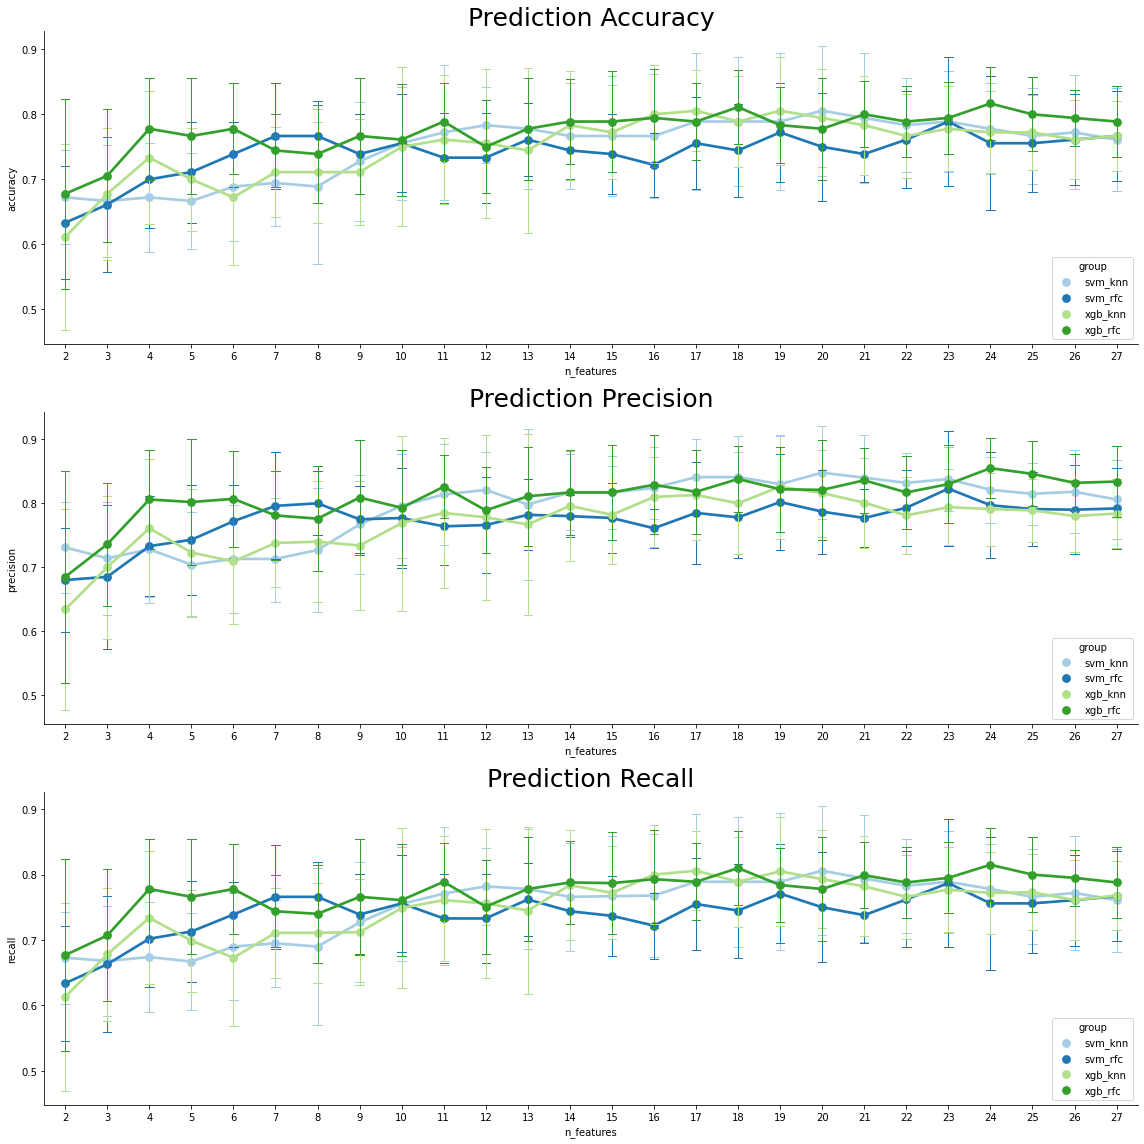

In [178]:
# Initialize the figure
f, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(16,16))
sns.despine()

# Show the conditional means
sns.pointplot(x="n_features", y="accuracy", hue="group",
              data=df, dodge=False, palette="Paired",
              capsize=0.2 , ci="sd", errwidth=1, ax=ax1)
ax1.set_title("Prediction Accuracy", fontsize = 25)

# Show the conditional means
sns.pointplot(x="n_features", y="precision", hue="group",
              data=df, dodge=False, palette="Paired",
              capsize=0.2 , ci="sd", errwidth=1, ax=ax2)
ax2.set_title("Prediction Precision", fontsize = 25)

# Show the conditional means
sns.pointplot(x="n_features", y="recall", hue="group",
              data=df, dodge=False, palette="Paired",
              capsize=0.2 , ci="sd", errwidth=1, ax=ax3)
ax3.set_title("Prediction Recall", fontsize = 25)
plt.tight_layout()
plt.savefig('ML.outcomes.pdf')

In [181]:
df.to_csv('ML.outcomes.csv')